(330, 27) ++++++++Rows & Col: without Big Mountain
(329, 27) +++++++ Rows & Col: Other than Whitefish Mountain Resort

Name                   0
Region                 0
state                  0
summit_elev            0
vertical_drop          0
base_elev              0
trams                  0
fastEight            166
fastSixes              0
fastQuads              0
quad                   0
triple                 0
double                 0
surface                0
total_chairs           0
Runs                   4
TerrainParks          51
LongestRun_mi          5
SkiableTerrain_ac      3
Snow Making_ac        46
daysOpenLastYear      51
yearsOpen              1
averageSnowfall       14
AdultWeekday          54
AdultWeekend          51
projectedDaysOpen     47
NightSkiing_ac       143
dtype: int64 print(data.isnull().sum()+++++ before fillna ++++++++


Name                 0
Region               0
state                0
summit_elev          0
vertical_drop        0
base_elev            0

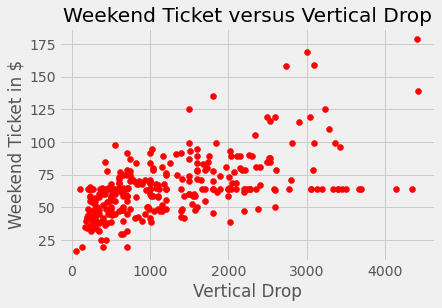

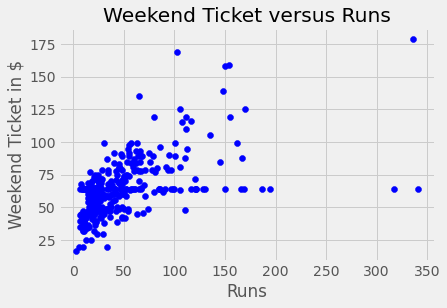

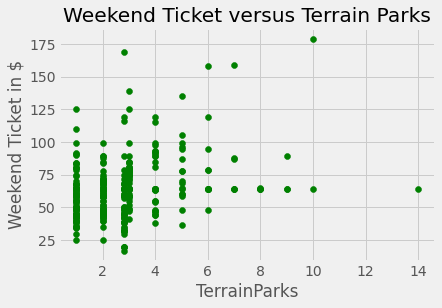

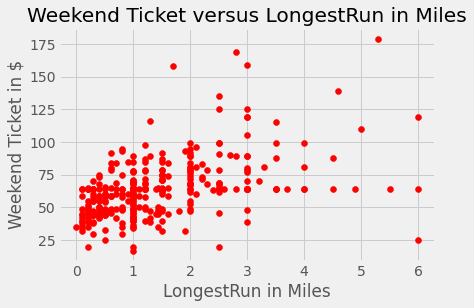

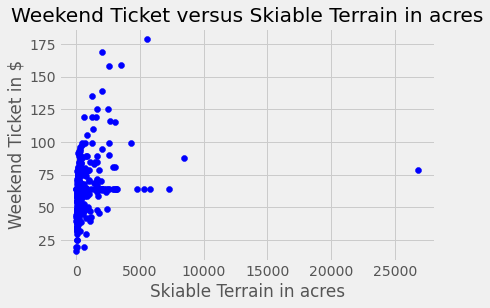

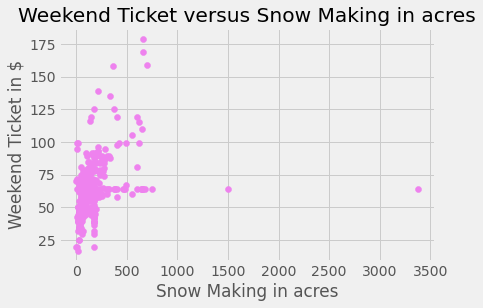

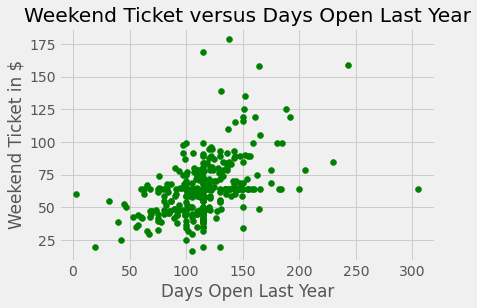

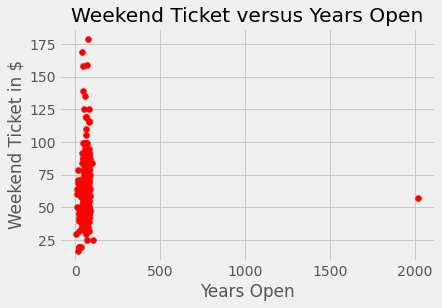

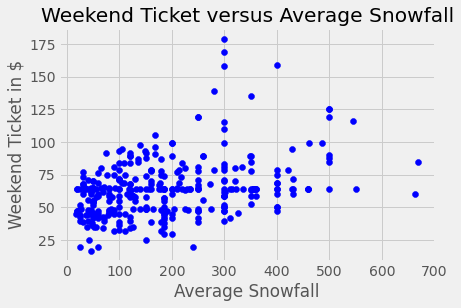

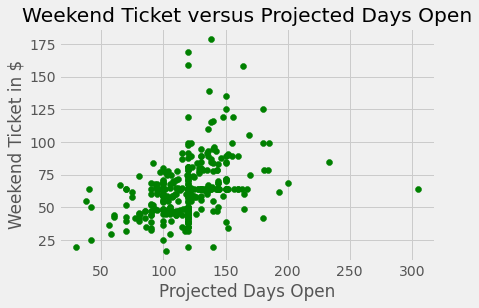

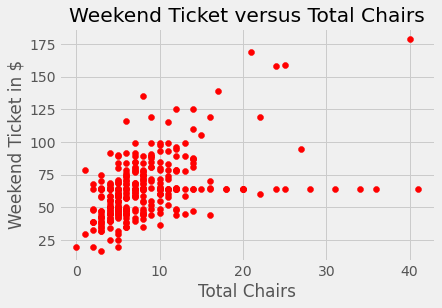

151    81.0
Name: AdultWeekend, dtype: float64 <--Whitefish AdultWeekend++++++++++
151    2353
Name: vertical_drop, dtype: int64 <--Whitefish vertical_drop+++++++++
151    105.0
Name: Runs, dtype: float64 <--Whitefish Runs++++++++++++++++++
151    3.3
Name: LongestRun_mi, dtype: float64 <--Whitefish LongestRun_mi+++++++++
151    123.0
Name: daysOpenLastYear, dtype: float64 <--Whitefish daysOpenLastYear++++++
151    14
Name: total_chairs, dtype: int64 <--Whitefish total_chairs++++++++++
64.11 Other AdultWeekend_mean+++++++++++++++
1211.97 Other vertical_drop_mean++++++++++++++
48.04 Other Runs_mean+++++++++++++++++++++
1.43 Other LongestRun_mi_mean+++++++++++
115.08 Other daysOpenLastYear_mean+++++++++
8.25 tOther otal_chairs_mean+++++++++++++++
151    1.26
Name: AdultWeekend, dtype: float64 <--Whitfish_to_Other Ratio of Adult weekend price ++
151    1.94
Name: vertical_drop, dtype: float64 <--Whitfish_to_Other Ratio of Vertical Drop +++++++
151    2.19
Name: Runs, dtype: float64 <--Whi

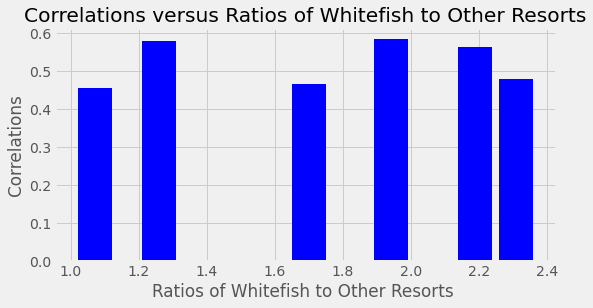

<AxesSubplot:title={'center':'Features versus Ratio of Whtefish to Other Resorts'}, xlabel='Features'>

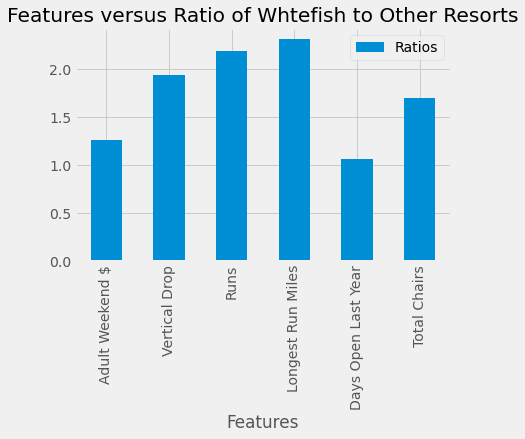

In [8]:
'''
Python Script Name: ....  Whitefish_Mountain.ipynb

Business request from Whitefish Mountain Resort is to evaluate the services and
facilities compare with other resorts, and recommend whether weekend ticket price of
$81.00 is justified, if so, a possibility the ticket price can be increased 

A random forest regressor. A random forest is a meta 
estimator that fits a number of decision trees
on various sub-samples of the dataset and uses 
averaging to improve the predictive accuracy and control 
over-fitting. ... The maximum depth of the tree.
++++++++++++++++++++++++++++++++++++++++++++++++++++++++
'''
import numpy as np
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings('ignore')

### data: without "Big Mountain"  (Big Mountain Resort renamed as Whitefish Mountain in 2007)
### data_o: Other Resorts (without "Big Mountain" and "Whitefish Mountain Resort")
### data_w: only Whitefish Mountain Resort
data = pd.read_csv("/Users/aditonangi/ski_data.csv")
print(data.shape, '++++++++Rows & Col: without Big Mountain')
data_o = data[data.Name != "Whitefish Mountain Resort"]
print(data_o.shape, '+++++++ Rows & Col: Other than Whitefish Mountain Resort' )
data_w =  data[data.Name == "Whitefish Mountain Resort"]

### Extract info on AdultWeekend.max()+& Whitefish+++++++++++++++++   beg
data_o_max = data_o[data_o.AdultWeekend == data_o.AdultWeekend.max()]
data_o_maxTrans =data_o_max.T    ### transposed
data_o_maxTrans.to_csv("AdultWeekend_max.csv") 
data_wTrans = data_w.T
data_wTrans.to_csv("Whitefish_Resort.csv")
###++###++++++++++++++++++++++++++++++++++++++++++++++++++++++++++.   end
### print()
### print(data_w.shape, '+++++++ Rows & Col: only Whitefish Mountain Resort' )
### print()
### print(data.head(3), '<--++++++++++++++++++=print(data.head(3)')
### print()
### print(data.tail(3), '<--++++++++++++++++++=print(data.tail(3)')
### print()
### print('data.describe()+++++++++++++++++beg')
### print(data.describe())
### print('data.describe()+++++++++++++++++end')

### print('print(data.items())+++++++++++++beg')
### print(data.items())
### print('print(data.items())+++++++++++++end')
### print()
### replace missing values with mean (with median corr-coeff lower)

print()
print(data.isnull().sum(), 'print(data.isnull().sum()+++++ before fillna ++++++++')
print()

for column, value in data.items():
###print(column)
    if data[column].dtype == np.number:
        data[column] = data[column].fillna(data[column].mean())
print()
print(data.isnull().sum(), 'Print(data.isnull().sum()++After fillna w/ mean+++++++')
print()
        
### print('print(data.items()) or columns+++++++++++++end')
### print()
### print('print(data.head(3))+++After update w/ mean++++++++++beg')
### print(data.head(3))
### print('print(data.head(3))+++After update w/ mean++++++++++end')
### print()
### print('print(data.tail(3))+++After update w/ mean++++++++++beg')
### print(data.tail(3))
### print('print(data.tail(3))++After update w/ mean+++++++++++end')

### print(data.shape,'Rows and Columns: After update /w mean +++++++++,' )
### print()
### print()
### ### print('print(data)  begin+++++++++++++++++++')
### ### print(data)
### print('print(data)  end+++++++++++++++++++')
### print()

y = data.loc[:, ['AdultWeekend']]
y = np.ravel(y)   ### converts verical 2d array to horizontal 1d array

### print()
### print('print(y)  begin+++++++++++++++++++')
### print(y)
### print('print(y)  end+++++++++++++++++++')
### print()

X = data.loc[:, ['vertical_drop']]      ###. good correlation
X1 = data.loc[:,['Runs']]               ###. good correlation
X2 = data.loc[:,['TerrainParks']]
X3 = data.loc[:,['LongestRun_mi']]      ###. good correlation
X4 = data.loc[:,['SkiableTerrain_ac']]  
X5 = data.loc[:,['Snow Making_ac']]    
X6 = data.loc[:,['daysOpenLastYear']]   ###. good correlation
X7 = data.loc[:,['yearsOpen']]
X8 = data.loc[:,['averageSnowfall']]
X9 = data.loc[:,['projectedDaysOpen']]
X10 = data.loc[:,['total_chairs']]      ###. good correlation
### X11 = data.loc[:, ['vertical_drop','Runs','LongestRun_mi', 'daysOpenLastYear', 'total_chairs']]
print()
correlation = data['vertical_drop'].corr(data['AdultWeekend'])
print(correlation, 'Correlation between Verical Drop and Adult Weekend Ticket in $')
print()
correlation = data['Runs'].corr(data['AdultWeekend'])
print(correlation, 'Correlation between Runs and Adult Weekend Ticket in $')
print()
correlation = data['TerrainParks'].corr(data['AdultWeekend'])
print(correlation, 'Correlation between TerrainParks and Adult Weekend Ticket in $')
print()
correlation = data['LongestRun_mi'].corr(data['AdultWeekend'])
print(correlation, 'Correlation between LongestRun_mi and Adult Weekend Ticket in $')
print()
correlation = data['SkiableTerrain_ac'].corr(data['AdultWeekend'])
print(correlation, 'Correlation between SkiableTerrain_ac and Adult Weekend Ticket in $')
print()
correlation = data['Snow Making_ac'].corr(data['AdultWeekend'])
print(correlation, 'Correlation between Snow Making_ac and Adult Weekend Ticket in $')
print()
correlation = data['daysOpenLastYear'].corr(data['AdultWeekend'])
print(correlation, 'Correlation between daysOpenLastYear and Adult Weekend Ticket in $')
print()
correlation = data['yearsOpen'].corr(data['AdultWeekend'])
print(correlation, 'Correlation between yearsOpen and Adult Weekend Ticket in $')
print()
correlation = data['averageSnowfall'].corr(data['AdultWeekend'])
print(correlation, 'Correlation between Average Snowfall and Adult Weekend Ticket in $')
print()
correlation = data['projectedDaysOpen'].corr(data['AdultWeekend'])
print(correlation, 'Correlation between Projected Days Open and Adult Weekend Ticket in $')
print()
correlation = data['total_chairs'].corr(data['AdultWeekend'])
print(correlation, 'Correlation between Total Chairs and Adult Weekend Ticket in $')
print()
###  X = [['fastEight'], ['Runs'], ['TerrainParks'], ['LongestRun_mi'], ['SkiableTerrain_ac'],
### ['Snow Making_ac'], ['daysOpenLastYear'], ['yearsOpen'],['averageSnowfall'],
### ['projectedDaysOpen'],['total_chairs']]
###+++++++++++++++++++++++++++++++++++++++++++++++++++
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X1_train, X1_test, y_train, y_test = train_test_split(X1, y, test_size=0.2)
X2_train, X2_test, y_train, y_test = train_test_split(X2, y, test_size=0.2)
X3_train, X3_test, y_train, y_test = train_test_split(X3, y, test_size=0.2)
X4_train, X4_test, y_train, y_test = train_test_split(X4, y, test_size=0.2)
X5_train, X5_test, y_train, y_test = train_test_split(X5, y, test_size=0.2)
X6_train, X6_test, y_train, y_test = train_test_split(X6, y, test_size=0.2)
X7_train, X7_test, y_train, y_test = train_test_split(X7, y, test_size=0.2)
X8_train, X8_test, y_train, y_test = train_test_split(X8, y, test_size=0.2)
X9_train, X9_test, y_train, y_test = train_test_split(X9, y, test_size=0.2)
X10_train, X10_test, y_train, y_test = train_test_split(X10, y, test_size=0.2)
###+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
rf.fit(X1_train,y_train)
rf.fit(X2_train,y_train)
rf.fit(X3_train,y_train)
rf.fit(X4_train,y_train)
rf.fit(X5_train,y_train)
rf.fit(X6_train,y_train)
rf.fit(X7_train,y_train)
rf.fit(X8_train,y_train)
rf.fit(X9_train,y_train)
rf.fit(X10_train,y_train)
pred = rf.predict(X_test)
pred = rf.predict(X1_test)
pred = rf.predict(X2_test)
pred = rf.predict(X3_test)
pred = rf.predict(X4_test)
pred = rf.predict(X5_test)
pred = rf.predict(X6_test)
pred = rf.predict(X7_test)
pred = rf.predict(X8_test)
pred = rf.predict(X9_test)
pred = rf.predict(X10_test)
### +++++++++++++++++++++++++++++++++++++=
### print(rf, '<-- print(rf)++++++++++++')
### print()
### print(pred, '<-- print(pred)++++++++')
### print()

###+++++++++++++++++++++++++
plt.scatter(X, y, color = 'red')
plt.title('Weekend Ticket versus Vertical Drop')
plt.xlabel('Vertical Drop')
plt.ylabel('Weekend Ticket in $')
plt.show()
###++++++++++++++++++++++++++
plt.scatter(X1, y, color = 'blue')
plt.title('Weekend Ticket versus Runs')
plt.xlabel('Runs')
plt.ylabel('Weekend Ticket in $')
plt.show()
###++++++++++++++++++++++++++
plt.scatter(X2, y, color = 'green')
plt.title('Weekend Ticket versus Terrain Parks')
plt.xlabel('TerrainParks')
plt.ylabel('Weekend Ticket in $')
plt.show()
###++++++++++++++++++++++++++
plt.scatter(X3, y, color = 'red')
plt.title('Weekend Ticket versus LongestRun in Miles')
plt.xlabel('LongestRun in Miles')
plt.ylabel('Weekend Ticket in $')
plt.show()
###++++++++++++++++++++++++++
plt.scatter(X4, y, color = 'blue')
plt.title('Weekend Ticket versus Skiable Terrain in acres')
plt.xlabel('Skiable Terrain in acres')
plt.ylabel('Weekend Ticket in $')
plt.show()
###++++++++++++++++++++++++++
plt.scatter(X5, y, color = 'violet')
plt.title('Weekend Ticket versus Snow Making in acres')
plt.xlabel('Snow Making in acres')
plt.ylabel('Weekend Ticket in $')
plt.show()
###++++++++++++++++++++++++++
plt.scatter(X6, y, color = 'green')
plt.title('Weekend Ticket versus Days Open Last Year')
plt.xlabel('Days Open Last Year')
plt.ylabel('Weekend Ticket in $')
plt.show()
###++++++++++++++++++++++++++
plt.scatter(X7, y, color = 'red')
### plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('Weekend Ticket versus Years Open')
plt.xlabel('Years Open')
plt.ylabel('Weekend Ticket in $')
plt.show()
###++++++++++++++++++++++++++
plt.scatter(X8, y, color = 'blue')
### plt.plot(X_grid, regressor.predict(X_grid), color = 'violet')
plt.title('Weekend Ticket versus Average Snowfall')
plt.xlabel('Average Snowfall')
plt.ylabel('Weekend Ticket in $')
plt.show()
###++++++++++++++++++++++++++
plt.scatter(X9, y, color = 'green')
plt.title('Weekend Ticket versus Projected Days Open')
plt.xlabel('Projected Days Open')
plt.ylabel('Weekend Ticket in $')
plt.show()
###++++++++++++++++++++++++++
plt.scatter(X10, y, color = 'red')
plt.title('Weekend Ticket versus Total Chairs')
plt.xlabel('Total Chairs')
plt.ylabel('Weekend Ticket in $')
plt.show()
###+++++++++++++++++++++++++++++=
plt.style.use('ggplot')
###. define feature values for  Whitefish++++++++++++++++++++++++++++
Wfr_AW    = data_w['AdultWeekend']
Wfr_VD    = data_w['vertical_drop']
Wfr_Runs  = data_w['Runs']
Wfr_LR_mi = data_w['LongestRun_mi']
Wfr_DOLY  = data_w['daysOpenLastYear']
Wfr_TC    = data_w['total_chairs']
print(Wfr_AW,   '<--Whitefish AdultWeekend++++++++++')
print(Wfr_VD,   '<--Whitefish vertical_drop+++++++++')
print(Wfr_Runs, '<--Whitefish Runs++++++++++++++++++')
print(Wfr_LR_mi,'<--Whitefish LongestRun_mi+++++++++')
print(Wfr_DOLY, '<--Whitefish daysOpenLastYear++++++')
print(Wfr_TC,   '<--Whitefish total_chairs++++++++++')
###. get mean values for Other than Whitefish resorts +++++++++++++++++
Oth_AW_mean    = round(data_o['AdultWeekend'].mean(),2   )
Oth_VD_mean    = round(data_o['vertical_drop'].mean(),2  )
Oth_Runs_mean  = round(data_o['Runs'].mean(),2          )
Oth_LR_mi_mean =round(data_o['LongestRun_mi'].mean(),2  )
Oth_DOLY_mean  =round(data_o['daysOpenLastYear'].mean(),2)
Oth_TC_mean    =round(data_o['total_chairs'].mean(),2   )
print(Oth_AW_mean, 'Other AdultWeekend_mean+++++++++++++++')
print(Oth_VD_mean, 'Other vertical_drop_mean++++++++++++++')
print(Oth_Runs_mean, 'Other Runs_mean+++++++++++++++++++++')
print(Oth_LR_mi_mean, 'Other LongestRun_mi_mean+++++++++++')
print(Oth_DOLY_mean, 'Other daysOpenLastYear_mean+++++++++')
print(Oth_TC_mean, 'tOther otal_chairs_mean+++++++++++++++')
###. +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++|
###. +++++++++++++.  Ratios. of Whitefish to Others' features ++++++++++++++++|
###. +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++|
W_O_Ratio_Adultweekend = round(Wfr_AW/Oth_AW_mean,2)
print(W_O_Ratio_Adultweekend, '<--Whitfish_to_Other Ratio of Adult weekend price ++')
W_O_Ratio_vertical_drop = round(Wfr_VD/Oth_VD_mean,2)
print(W_O_Ratio_vertical_drop, '<--Whitfish_to_Other Ratio of Vertical Drop +++++++')
W_O_Ratio_Runs = round(Wfr_Runs/Oth_Runs_mean,2)
print(W_O_Ratio_Runs, '<--Whitfish_to_Other Ratio of Runs +++++++++++++++++++++++++')
W_O_Ratio_LR_mi = round(Wfr_LR_mi/Oth_LR_mi_mean,2)
print(W_O_Ratio_LR_mi, '<--Whitfish_to_Other Ratio of LongestRun in Miles +++++++++')
W_O_Ratio_DOLY = round(Wfr_DOLY/Oth_DOLY_mean,2)
print(W_O_Ratio_DOLY, '<--Whitfish_to_Other Ratio of Days Open Last Year ++++++++++')
W_O_Ratio_TC = round(Wfr_TC/Oth_TC_mean,2)
print(W_O_Ratio_TC, '<--Whitfish_to_Other Ratio of Total_Chairs ++++++++++++++++++++')
### +++++++++++++++++++++++++++++++++++++++++++++++++++++--++++++++++++++++++++++++++++++
### plot these ratios versus their correlations+++++++++++++++++++++++++++++++++++++
plt.style.use('fivethirtyeight')

### ++++++++ Create a Series for Ratios +++++++++++++++++
data_ratio = np.array([1.26, 1.94, 2.19, 2.31, 1.07,1.70]) 
ser_ratio = pd.Series(data_ratio, index =[0, 1, 2, 3, 4, 5])
### print("New DataFrame combining two series:")
### +++++++++  Create a Series for Correlations ++++++++++
data_corr = np.array([0.58, 0.584, 0.563, 0.480, 0.456,0.466]) 
ser_corr = pd.Series(data_corr, index =[0, 1, 2, 3, 4, 5]) 
### print(ser_corr, '<--print(ser_corr++++++++++++++') 
### +++++++++  Create a Series for six featuress ++++++++++
data_feat = np.array(['Adult Weekend $','Vertical Drop','Runs','Longest Run Miles','Days Open Last Year','Total Chairs'])
ser_feat = pd.Series(data_feat, index =[0, 1, 2, 3, 4, 5]) 
### print(ser_corr, '<--print(ser_corr++++++++++++++') 
### ++++++++++++++++++++++++++++++++++++++++++++++++++
df_feat = pd.concat([ser_feat, ser_ratio], axis=1)
### ++++++++++++++++++++++++++++++++++++++++++++++++++
df_feat.columns = ["Features", "Ratios"]
print(df_feat, '<--print(df_feat++++++++++++')

df = pd.concat([ser_ratio, ser_corr], axis=1)
df.columns = ["Ratios", "Correlations"]
print(df, '<--print(df++++++++++++++')

### df.plot(x = "Boroughs", y = "Avg_over_20_Yrs_In_$", kind = "bar" , title="Top_Ten_London Boroughs")
### data.plot(x= "ratios", y= "corrs")

fig = plt.figure(figsize = (8, 4))
plt.bar(data_ratio, data_corr, color ='blue', width = 0.1)
plt.xlabel("Ratios of Whitefish to Other Resorts ") 
plt.ylabel("Correlations") 
plt.title("Correlations versus Ratios of Whitefish to Other Resorts") 
plt.show()
###+++++++++++++++++++++++++++++++++++++++++++++++++++++++++==
plt.style.use('fivethirtyeight')
df_feat.plot(x = "Features", y = "Ratios", kind = "bar" , title="Features versus Ratio of Whtefish to Other Resorts")
###++++++++++++++++++++++++++++++++++++++++++++++++++++++++